In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-daily-screen-time-for-children/screen_time.csv


In [2]:
df = pd.read_csv("/kaggle/input/average-daily-screen-time-for-children/screen_time.csv")
df.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


In [4]:
df.isnull().sum()

Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Gender'].value_counts()

Gender
Male                       66
Female                     66
Other/Prefer not to say    66
Name: count, dtype: int64

In [7]:
df['Screen Time Type'].unique()

array(['Educational', 'Recreational', 'Total'], dtype=object)

In [8]:
df['Day Type'].unique()

array(['Weekday', 'Weekend'], dtype=object)

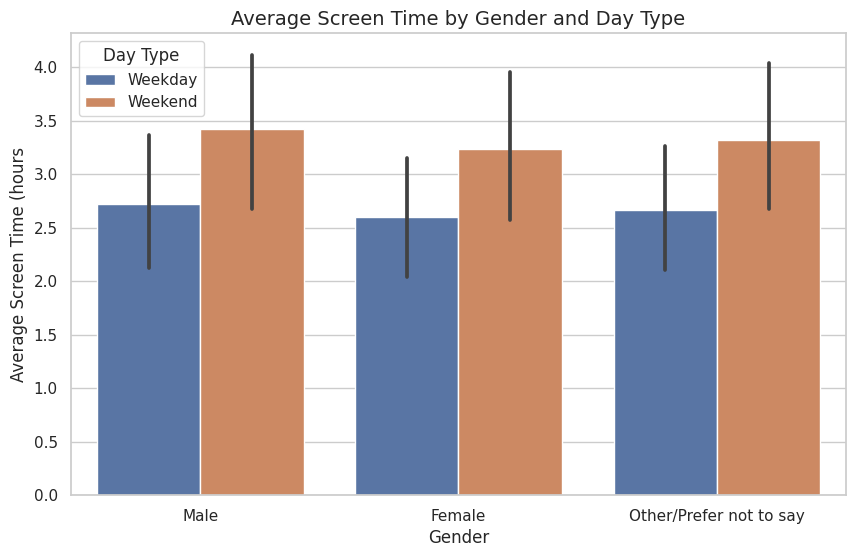

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Gender', y="Average Screen Time (hours)", hue="Day Type")
plt.title("Average Screen Time by Gender and Day Type", fontsize=14)
plt.ylabel("Average Screen Time (hours")
plt.xlabel("Gender")
plt.legend(title="Day Type")
plt.show()

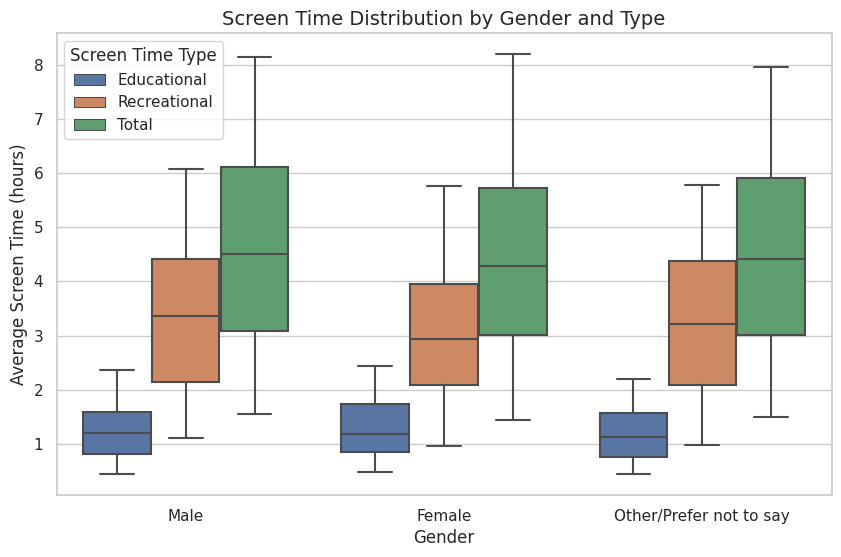

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Gender', y='Average Screen Time (hours)', hue = 'Screen Time Type')
plt.title('Screen Time Distribution by Gender and Type', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Average Screen Time (hours)')
plt.legend(title="Screen Time Type")
plt.show()

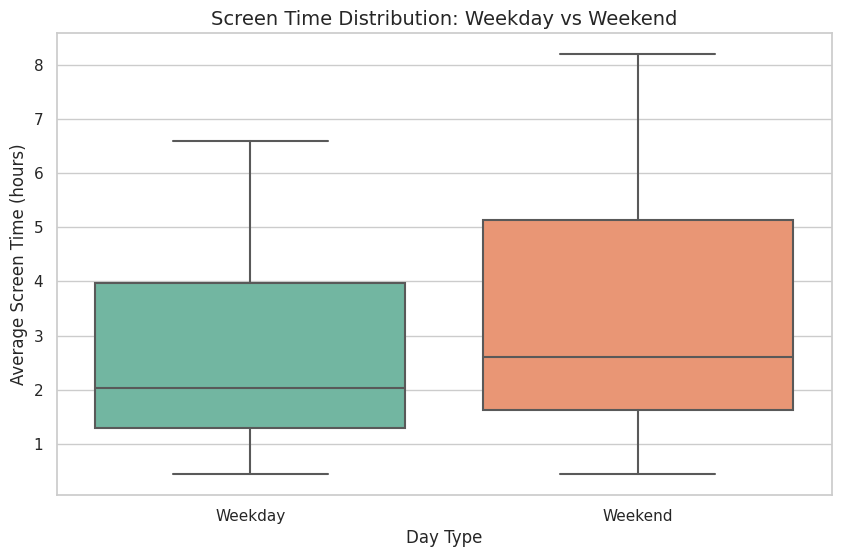

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Day Type', y='Average Screen Time (hours)', palette='Set2')
plt.title('Screen Time Distribution: Weekday vs Weekend', fontsize=14)
plt.xlabel("Day Type")
plt.ylabel("Average Screen Time (hours)")
plt.show()

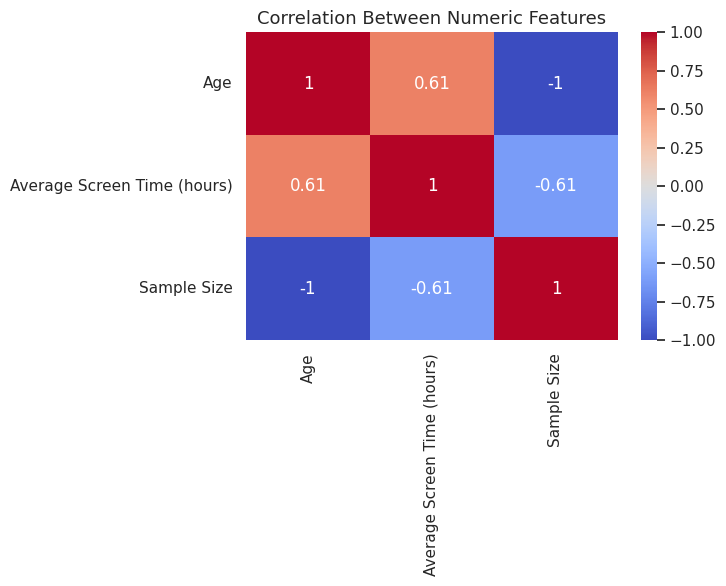

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features", fontsize=13)
plt.show()


In [13]:
df_total = df[df['Screen Time Type'] == 'Total'].copy()
df_total.reset_index(drop=True, inplace=True)

In [14]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df_total, columns=['Gender', 'Day Type'], drop_first=True)


In [15]:
df_encoded.drop(columns=['Screen Time Type', 'Sample Size'], inplace=True)

In [16]:
df_encoded.head(5)

,Age,Average Screen Time (hours),Gender_Male,Gender_Other/Prefer not to say,Day Type_Weekend
0,5,1.55,True,False,False
1,5,1.93,True,False,True
2,5,1.45,False,False,False
3,5,1.90,False,False,True
4,5,1.50,False,True,False


In [17]:
X = df_encoded.drop(columns=['Average Screen Time (hours)'])
y = df_encoded['Average Screen Time (hours)']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


print(f" Linear Regression Performance:")
print(f"RMSE : {rmse_lr:.3f}")
print(f" MSE : {mae_lr:.3f}")
print(f" R2 : {r2_lr:.3f}")

 Linear Regression Performance:
RMSE : 0.231
 MSE : 0.203
 R2 : 0.988


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print(f"\n Random Forest Performance:")
print(f"RMSE : {rmse_rf:.3f}")
print(f" MSE : {mae_rf:.3f}")
print(f" R2 : {r2_rf:.3f}")


 Random Forest Performance:
RMSE : 0.265
 MSE : 0.201
 R2 : 0.985


In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective = 'reg:squarederror', random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


print(f"\n XGBoost Performance:")
print(f"RMSE : {rmse_xgb:.3f}")
print(f" MSE : {mae_xgb:.3f}")
print(f" R2 : {r2_xgb:.3f}")


 XGBoost Performance:
RMSE : 0.184
 MSE : 0.129
 R2 : 0.993


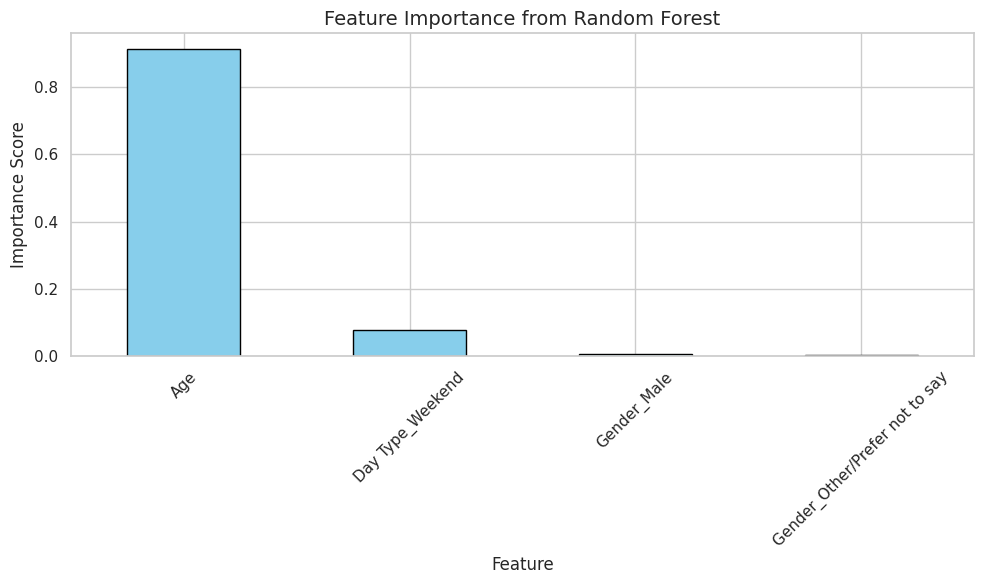

In [23]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importance from Random Forest", fontsize=14)
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

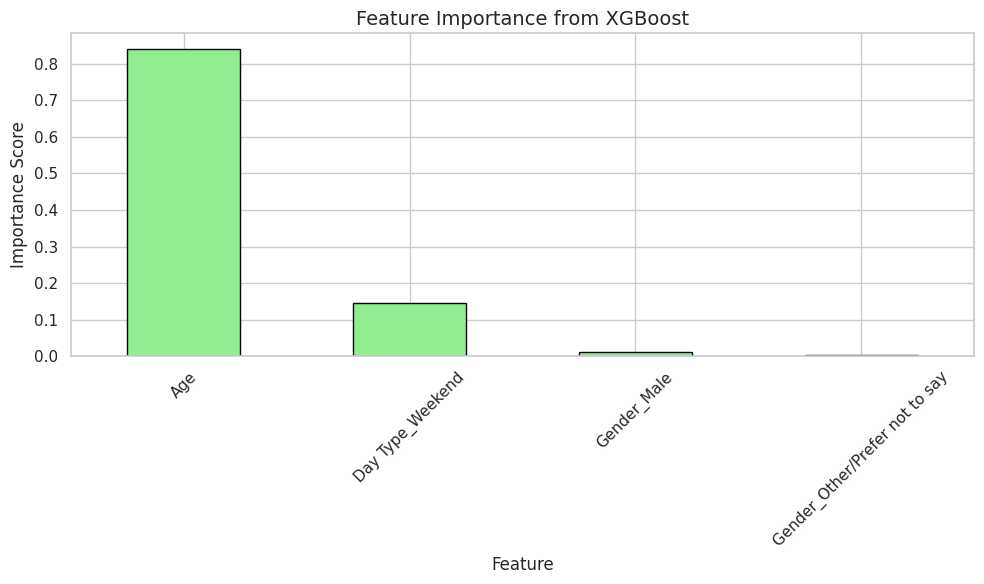

In [24]:
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_importance.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Feature Importance from XGBoost", fontsize=14)
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

# Evaluate with 5-Fold CV
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')

print("🔁 Random Forest 5-Fold R² Scores:", cv_scores_rf)
print("✅ Mean R²:", cv_scores_rf.mean())
print("📉 Std Dev:", cv_scores_rf.std())


🔁 Random Forest 5-Fold R² Scores: [-2.31044614  0.6965112   0.49651196  0.48262717 -0.57956931]
✅ Mean R²: -0.24287302313871084
📉 Std Dev: 1.1263841582177694


In [26]:
cv_scores_xgb = cross_val_score(xgb, X, y, cv=5, scoring='r2')

print("🔁 XGBoost 5-Fold R² Scores:", cv_scores_xgb)
print("✅ Mean R²:", cv_scores_xgb.mean())
print("📉 Std Dev:", cv_scores_xgb.std())


🔁 XGBoost 5-Fold R² Scores: [-1.95184035  0.56918503  0.64284779  0.52464444 -0.38445814]
✅ Mean R²: -0.11992424830796884
📉 Std Dev: 0.989753134856264


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X, y)

print("✅ Best Parameters:")
print(random_search.best_params_)
print("🎯 Best R² Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best Parameters:
{'colsample_bytree': 0.8550229885420852, 'learning_rate': 0.27616382277289797, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.9886848381556415}
🎯 Best R² Score: -0.21917789071814703


In [28]:
from xgboost import XGBRegressor

best_xgb = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8550,
    learning_rate=0.2762,
    max_depth=2,
    n_estimators=150,
    subsample=0.9887,
    random_state=42
)

best_xgb.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.855, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2762, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
import joblib

joblib.dump(best_xgb, 'final_xgboost_model.pkl')
print("✅ Model saved as final_xgboost_model.pkl")


✅ Model saved as final_xgboost_model.pkl
